# ADS Assignment 2

Titanic Ship Case Study
Problem Description:

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

1.) One of the reasons that the shipwreck led to such loss of life was that there were not
enough lifeboats for the passengers and crew.

2.) Although there was some element of luck involved in surviving the sinking, some groups of
people were more likely to survive than others, such as women, children, and the upper-
class.

The problem associated with the Titanic dataset is to predict whether a passenger survived the
disaster or not. The dataset contains various features such as passenger class, age, gender,
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can
be used to build a predictive model to determine the likelihood of a passenger surviving the
disaster. The dataset offers opportunities for feature engineering, data visualization, and model
selection, making it a valuable resource for developing and testing data analysis and machine
learning skills.

## 1. Download the dataset: titanic.csv
## 2. Load the dataset.

In [1]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## 3. Perform Below Visualizations.
## ● Univariate Analysis


Text(0.5, 1.0, 'Passenger Class Count')

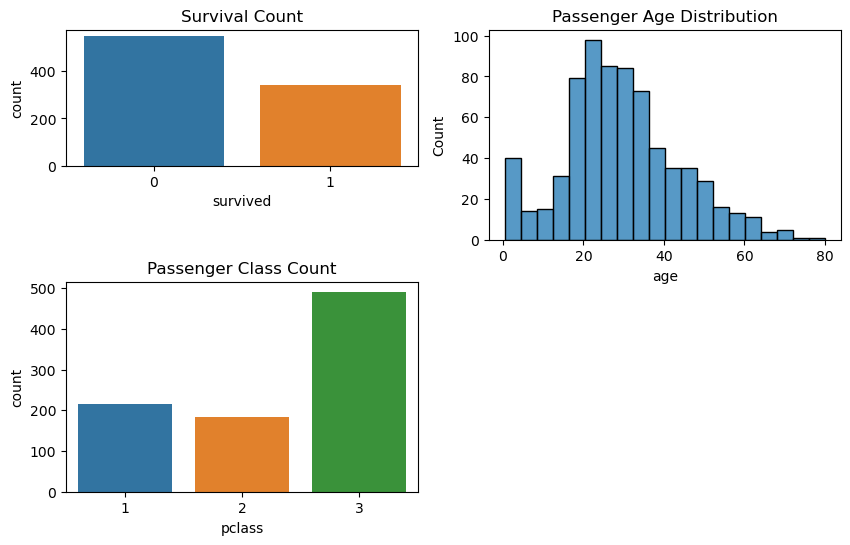

In [5]:
plt.figure(figsize=(10,6))

# Plotting the count of passengers by their survival status
plt.subplot(3,2,1)
sns.countplot(x='survived', data=df)
plt.title('Survival Count')

# Plotting the distribution of passenger ages
plt.subplot(2,2,2)
sns.histplot(df['age'].dropna(), bins=20)
plt.title('Passenger Age Distribution')

# Plotting the count of passengers by passenger class
plt.subplot(2,2,3)
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Count')

## ● Bi - Variate Analysis

Text(0.5, 1.0, 'Fare Distribution by Passenger Class')

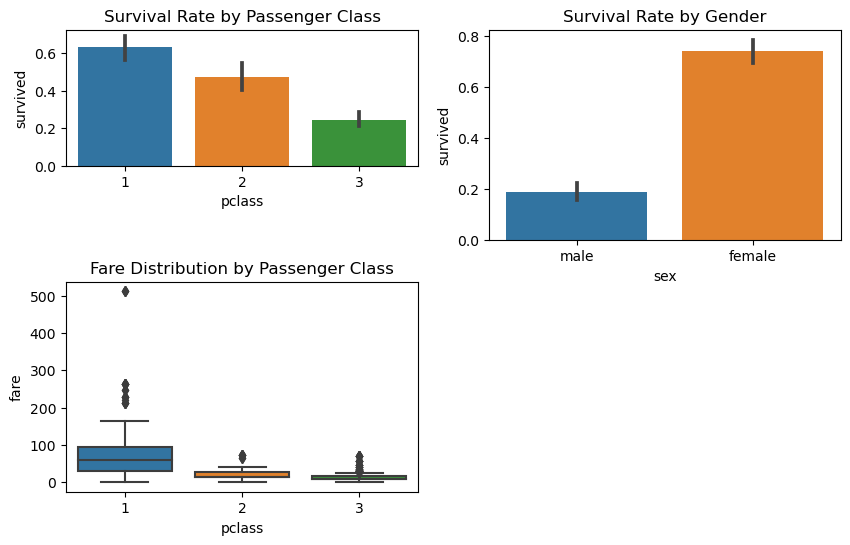

In [6]:
plt.figure(figsize=(10,6))

# Plotting the survival rate by passenger class
plt.subplot(3,2,1)
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')

# Plotting the survival rate by gender
plt.subplot(2,2,2)
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')

# Plotting the fare distribution by passenger class
plt.subplot(2,2,3)
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')


## ● Multi - Variate Analysis

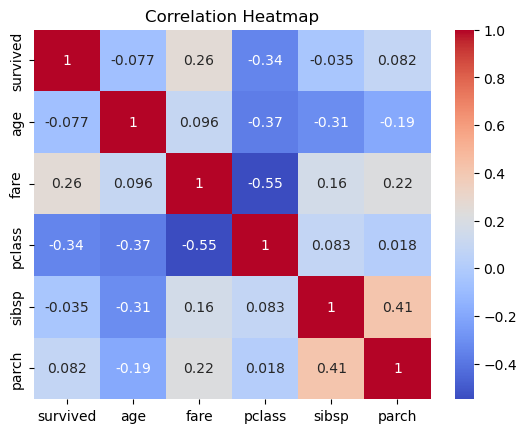

In [7]:
# Plotting the correlation heatmap of numeric variables
numeric_cols = ['survived', 'age', 'fare', 'pclass', 'sibsp', 'parch']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 4. Perform descriptive statistics on the dataset.

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Handle the Missing values.

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# Replacing the null values for the age attribute
df['age'].fillna(df['age'].mean(),inplace=True)

In [11]:
# Replacing the null values for the deck attribute
df['deck'].fillna(df['deck'].mode()[0],inplace=True)

In [12]:
# Replacing the null values for the deck attribute
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [13]:
# Replacing the null values for the deck attribute
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


## 6. Find the outliers and replace the outliers

In [16]:
# numeric columns
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

# Calculate the IQR for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the median value
for col in numeric_cols:
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = df[col].median()

# Verify if outliers have been replaced
outliers_replaced = df[(df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)].any()
print(outliers_replaced)


survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool


## 7. Check for Categorical columns and perform encoding.

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


In [18]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the encoded DataFrame
print(df_encoded.head())

   survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0         0       3  22.0      1      0   7.2500        True  False   
1         1       1  38.0      1      0  14.4542       False  False   
2         1       3  26.0      0      0   7.9250       False   True   
3         1       1  35.0      1      0  53.1000       False  False   
4         0       3  35.0      0      0   8.0500        True   True   

   sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0         1  ...       1       0       0       0       0   
1           1         0  ...       1       0       0       0       0   
2           1         0  ...       1       0       0       0       0   
3           1         0  ...       1       0       0       0       0   
4           0         1  ...       1       0       0       0       0   

   embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  \
0                      0                       0               

## 8. Split the data into dependent and independent variables.

In [19]:
x = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent variable

# Display the independent variables (features)
print("Independent values:\n",x.head())

# Display the dependent variable (target)
print("\nDependent variable:\n",y.head())

Independent values:
    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  14.4542        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True    C  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False    C  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True    C  Southampton    no   True  

Dependent variable:
 0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## 9. Scale the independent variables

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [21]:
x_scaled = scale.fit_transform(df_encoded)

# Create a new DataFrame with the scaled independent variables
df_scaled = pd.DataFrame(x_scaled, columns=df_encoded.columns)

# Display the scaled independent variables
print(df_scaled.head())

   survived    pclass       age     sibsp  parch      fare  adult_male  \
0 -0.789272  0.827377 -0.708584  1.347605    0.0 -0.797554    0.811922   
1  1.266990 -1.566107  0.924948  1.347605    0.0 -0.230556   -1.231645   
2  1.266990  0.827377 -0.300201 -0.570472    0.0 -0.744429   -1.231645   
3  1.266990 -1.566107  0.618661  1.347605    0.0  2.811012   -1.231645   
4 -0.789272  0.827377  0.618661 -0.570472    0.0 -0.734591    0.811922   

      alone  sex_female  sex_male  ...    deck_C    deck_D    deck_E  \
0 -1.231645   -0.737695  0.737695  ...  0.439057 -0.196116 -0.193009   
1 -1.231645    1.355574 -1.355574  ...  0.439057 -0.196116 -0.193009   
2  0.811922    1.355574 -1.355574  ...  0.439057 -0.196116 -0.193009   
3 -1.231645    1.355574 -1.355574  ...  0.439057 -0.196116 -0.193009   
4  0.811922   -0.737695  0.737695  ...  0.439057 -0.196116 -0.193009   

     deck_F    deck_G  embark_town_Cherbourg  embark_town_Queenstown  \
0 -0.121681 -0.067153              -0.482043      

## 10. Split the data into training and testing 

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [23]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
331,1,male,45.500000,0,0,28.5000,S,First,man,True,C,Southampton,no,True
733,2,male,23.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
382,3,male,32.000000,0,0,7.9250,S,Third,man,True,C,Southampton,no,True
704,3,male,26.000000,1,0,7.8542,S,Third,man,True,C,Southampton,no,False
813,3,female,6.000000,0,0,31.2750,S,Third,child,False,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.000000,0,0,7.6500,S,Third,woman,False,C,Southampton,yes,True
270,1,male,29.699118,0,0,31.0000,S,First,man,True,C,Southampton,no,True
860,3,male,41.000000,2,0,14.1083,S,Third,man,True,C,Southampton,no,False
435,1,female,14.000000,1,0,14.4542,S,First,child,False,B,Southampton,yes,False


In [24]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64

In [25]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,3,male,29.699118,1,0,15.2458,C,Third,man,True,C,Cherbourg,yes,False
439,2,male,31.000000,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
840,3,male,20.000000,0,0,7.9250,S,Third,man,True,C,Southampton,no,True
720,2,female,6.000000,0,0,33.0000,S,Second,child,False,C,Southampton,yes,False
39,3,female,14.000000,1,0,11.2417,C,Third,child,False,C,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3,male,17.000000,0,0,7.1250,S,Third,man,True,C,Southampton,no,True
773,3,male,29.699118,0,0,7.2250,C,Third,man,True,C,Cherbourg,no,True
25,3,female,38.000000,1,0,31.3875,S,Third,woman,False,C,Southampton,yes,False
84,2,female,17.000000,0,0,10.5000,S,Second,woman,False,C,Southampton,yes,True


In [26]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64